In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import ranksums

In [2]:
task1_df = pd.read_csv("data/task1_preprocessed.csv")
task2_df = pd.read_csv("data/task2_preprocessed.csv")

os.makedirs("figures", exist_ok=True)

In [3]:
task1_ai_group = task1_df[task1_df['ai'] == True]
task1_manual_group = task1_df[task1_df['ai'] == False]
task2_treatment = task2_df[task2_df['treatment'] == 'ai']
task2_control = task2_df[task2_df['treatment'] == 'human']

In [4]:
# Define color scheme
colors = {
    'ai_dark_gray': '#4F4F4F',
    'manual_work': 'yellow',
    'treatment_blue': '#1f77b4',  # Blue for treatment
    'control_orange': '#ff7f0e'  # Orange for control
}

# CodeHealth

In [37]:
# Task 1 descriptive statistics for CodeHealth by AI group
task1_codehealth_stats = (
    task1_df.groupby('ai')['codehealth']
    .describe()[['count', 'mean', 'std', 'min', '50%', 'max']]
    .rename(columns={'count': 'N', '50%': 'median'})
)

# Task 2 descriptive statistics for CodeHealth by treatment group
task2_codehealth_stats = (
    task2_df.groupby('treatment')['codehealth']
    .describe()[['count', 'mean', 'std', 'min', '50%', 'max']]
    .rename(columns={'count': 'N', '50%': 'median'})
)

# Display results
print("Task 1 CodeHealth Descriptive Statistics:")
print(task1_codehealth_stats)
print("\nTask 2 CodeHealth Descriptive Statistics:")
print(task2_codehealth_stats)


Task 1 CodeHealth Descriptive Statistics:
          N      mean       std   min  median   max
ai                                                 
False  37.0  8.320811  0.148892  8.00    8.28  8.63
True   39.0  8.353590  0.189174  7.97    8.35  9.12

Task 2 CodeHealth Descriptive Statistics:
              N      mean       std   min  median   max
treatment                                              
ai         40.0  8.487250  0.172834  8.07    8.47  8.89
human      35.0  8.440857  0.162306  8.15    8.42  8.87


# Task 1

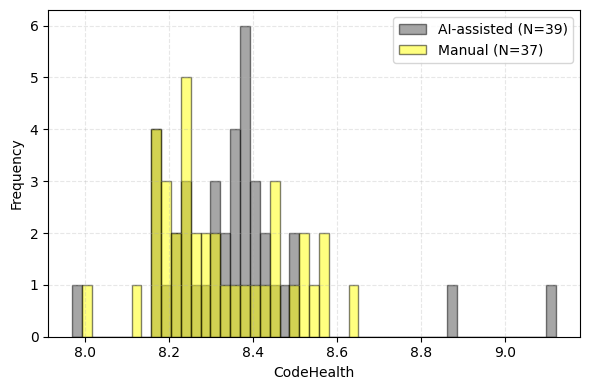

In [7]:
plt.figure(figsize=(6, 4))

# Drop NaNs and count
ai_codehealth = task1_ai_group['codehealth'].dropna()
manual_codehealth = task1_manual_group['codehealth'].dropna()

# Legend labels with sample sizes
ai_label = f"AI-assisted (N={len(ai_codehealth)})"
manual_label = f"Manual (N={len(manual_codehealth)})"

# Determine combined min/max for consistent binning
combined_min = min(ai_codehealth.min(), manual_codehealth.min())
combined_max = max(ai_codehealth.max(), manual_codehealth.max())
bins = np.linspace(combined_min, combined_max, 50)

# Plot histograms
plt.hist(ai_codehealth, bins=bins, 
         color=colors['ai_dark_gray'], alpha=0.5, edgecolor='black', label=ai_label)
plt.hist(manual_codehealth, bins=bins, 
         color=colors['manual_work'], alpha=0.5, edgecolor='black', label=manual_label)

# Labels and style
plt.xlabel('CodeHealth')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig("figures/task1_codehealth_distribution.png", dpi=300)
plt.show()

# Task 2

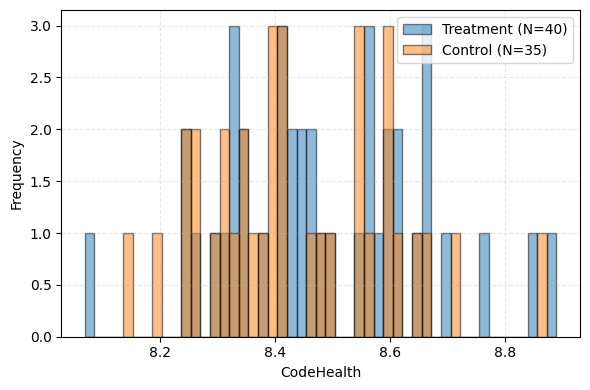

In [13]:
plt.figure(figsize=(6, 4))

# Drop NaNs and count
treatment_codehealth = task2_treatment['codehealth'].dropna()
control_codehealth = task2_control['codehealth'].dropna()

# Legend labels with sample sizes
treatment_label = f"Treatment (N={len(treatment_codehealth)})"
control_label = f"Control (N={len(control_codehealth)})"

# Determine combined min/max for consistent binning
combined_min = min(treatment_codehealth.min(), control_codehealth.min())
combined_max = max(treatment_codehealth.max(), control_codehealth.max())
bins = np.linspace(combined_min, combined_max, 50)

# Plot histograms
plt.hist(treatment_codehealth, bins=bins, 
         color=colors['treatment_blue'], alpha=0.5, edgecolor='black', label=treatment_label)
plt.hist(control_codehealth, bins=bins, 
         color=colors['control_orange'], alpha=0.5, edgecolor='black', label=control_label)

# Labels and style
plt.xlabel('CodeHealth')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig("figures/task2_codehealth_distribution.png", dpi=300)
plt.show()


## Inferential statistics

In [22]:
treatment = task2_treatment['codehealth'].dropna()
control = task2_control['codehealth'].dropna()

# Step 1: Perform the Shapiro-Wilk test for normality
shapiro_treatment = shapiro(treatment)
shapiro_control = shapiro(control)

# Step 2: Display the results
print("Shapiro-Wilk Test for Normality:")
print(f"Treatment Group: W={shapiro_treatment.statistic:.4f}, p-value={shapiro_treatment.pvalue:.4e}")
print(f"Control Group: W={shapiro_control.statistic:.4f}, p-value={shapiro_control.pvalue:.4e}")

Shapiro-Wilk Test for Normality:
Treatment Group: W=0.9849, p-value=8.6237e-01
Control Group: W=0.9753, p-value=6.0335e-01


We cannot reject the null hypothesis of normality.

In [24]:
# Levene's test
stat, p = levene(treatment_codehealth, control_codehealth, center='mean')

print("Levene’s Test for Equality of Variances:")
print(f"  Statistic = {stat:.4f}")
print(f"  p-value   = {p:.4e}")

Levene’s Test for Equality of Variances:
  Statistic = 0.0866
  p-value   = 7.6934e-01


We cannot reject the null hypothesis of equal variance.

In [27]:
# Welch's t-test
stat, p = ttest_ind(treatment, control, equal_var=True)

print("Welch’s t-test (unequal variances assumed):")
print(f"  t-statistic = {stat:.4f}")
print(f"  p-value     = {p:.4e}")

Welch’s t-test (unequal variances assumed):
  t-statistic = 1.1930
  p-value     = 2.3673e-01


We cannot reject the null hypothesis of difference.

In [28]:
# Function to compute Cohen's d effect size
def cohens_d(group1, group2):
    """Compute Cohen's d for effect size."""
    group1 = group1.dropna()
    group2 = group2.dropna()
    
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)  # ddof=1 for sample standard deviation

    # Pooled standard deviation
    pooled_std = np.sqrt(((len(group1) - 1) * std1**2 + (len(group2) - 1) * std2**2) / (len(group1) + len(group2) - 2))

    # Compute Cohen's d
    d = (mean1 - mean2) / pooled_std
    return d

# Compute effect size for CodeHealth
effect_size_codehealth = cohens_d(task2_treatment['codehealth'], task2_control['codehealth'])

# Print result
print(f"Cohen's d for CodeHealth: {effect_size_codehealth:.4f}")

# Interpret effect size magnitude
if abs(effect_size_codehealth) < 0.2:
    magnitude = "Negligible"
elif abs(effect_size_codehealth) < 0.5:
    magnitude = "Small"
elif abs(effect_size_codehealth) < 0.8:
    magnitude = "Medium"
else:
    magnitude = "Large"

print(f"Effect Size Interpretation: {magnitude}")


Cohen's d for CodeHealth: 0.2761
Effect Size Interpretation: Small


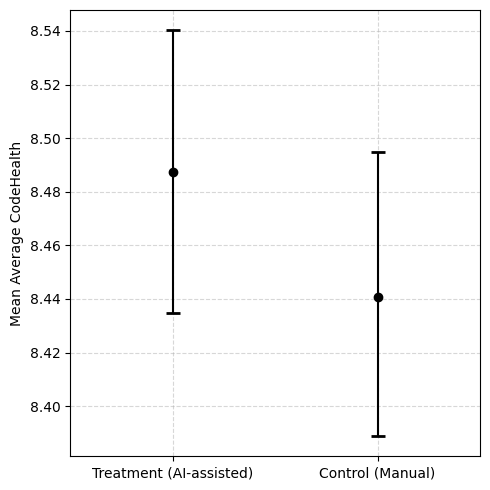

Bootstrap Confidence Intervals (95% CI) for CodeHealth:
Treatment (AI-assisted): 8.49  (95% CI: 8.43 - 8.54)
Control (Manual):       8.44  (95% CI: 8.39 - 8.49)


In [38]:
def bootstrap_ci_mean(data, n_bootstraps=1000000, ci=95):
    """Compute percentile bootstrap confidence interval for the mean"""
    boot_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstraps)]
    lower = np.percentile(boot_means, (100 - ci) / 2)
    upper = np.percentile(boot_means, 100 - (100 - ci) / 2)
    return np.mean(data), lower, upper

# Compute Bootstrap CIs for CodeHealth in Task 2
codehealth_treatment_mean, codehealth_treatment_lower, codehealth_treatment_upper = bootstrap_ci_mean(task2_treatment['codehealth'].dropna())
codehealth_control_mean, codehealth_control_lower, codehealth_control_upper = bootstrap_ci_mean(task2_control['codehealth'].dropna())

# Error bars
lower_bounds = [codehealth_treatment_mean - codehealth_treatment_lower, codehealth_control_mean - codehealth_control_lower]
upper_bounds = [codehealth_treatment_upper - codehealth_treatment_mean, codehealth_control_upper - codehealth_control_mean]
yerr_codehealth = [lower_bounds, upper_bounds]

# Plot
plt.figure(figsize=(5, 5))
x_pos = [0, 1]
means = [codehealth_treatment_mean, codehealth_control_mean]
plt.errorbar(x_pos, means, yerr=yerr_codehealth, fmt='o', capsize=5, capthick=2, color='black')

# Fix x-axis
plt.xticks(x_pos, ['Treatment (AI-assisted)', 'Control (Manual)'])
plt.xlim(-0.5, 1.5)
plt.ylabel('Mean Average CodeHealth')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("figures/task2_bootstrap_codehealth_ci.png", dpi=300)
plt.show()

# Print numerical results
print("Bootstrap Confidence Intervals (95% CI) for CodeHealth:")
print(f"Treatment (AI-assisted): {codehealth_treatment_mean:.2f}  (95% CI: {codehealth_treatment_lower:.2f} - {codehealth_treatment_upper:.2f})")
print(f"Control (Manual):       {codehealth_control_mean:.2f}  (95% CI: {codehealth_control_lower:.2f} - {codehealth_control_upper:.2f})")


# Bonus! Comparing AI-dev and !AI-dev for Task 1

In [42]:
# Extract CodeHealth values for Task 1
ai_codehealth = task1_ai_group['codehealth'].dropna()
manual_codehealth = task1_manual_group['codehealth'].dropna()

# Shapiro–Wilk normality test
stat_ai, p_ai = shapiro(ai_codehealth)
stat_manual, p_manual = shapiro(manual_codehealth)

print("Shapiro–Wilk Test for Normality (Task 1, CodeHealth):")
print(f"  AI-assisted: W = {stat_ai:.4f}, p = {p_ai:.4e}")
print(f"  Manual:      W = {stat_manual:.4f}, p = {p_manual:.4e}")

Shapiro–Wilk Test for Normality (Task 1, CodeHealth):
  AI-assisted: W = 0.7973, p = 7.3850e-06
  Manual:      W = 0.9521, p = 1.1281e-01


We reject that the AI-dev group's CodeHealth is normally distributed, but not the !AI-dev.

In [43]:
# Extract CodeHealth values
ai_codehealth = task1_ai_group['codehealth'].dropna()
manual_codehealth = task1_manual_group['codehealth'].dropna()

# Wilcoxon Rank-Sum Test (Mann–Whitney U) for CodeHealth
statistic, p_value = ranksums(ai_codehealth, manual_codehealth)

print("Wilcoxon Rank-Sum Test (CodeHealth, Task 1):")
print(f"  Statistic = {statistic:.4f}")
print(f"  p-value   = {p_value:.4e}")

Wilcoxon Rank-Sum Test (CodeHealth, Task 1):
  Statistic = 0.6391
  p-value   = 5.2274e-01


We cannot reject the null hypothesis that thers is a significant difference.

In [45]:
# Step 3: Calculate Cliff’s Delta effect size
def cliffs_delta(x, y):
    n_x = len(x)
    n_y = len(y)
    greater = 0
    lesser = 0

    # Pairwise comparisons
    for i in x:
        for j in y:
            if i > j:
                greater += 1
            elif i < j:
                lesser += 1

    # Calculate Cliff’s Delta
    delta = (greater - lesser) / (n_x * n_y)
    return delta

In [46]:
# Corrected version - Just pass the Series directly
delta = cliffs_delta(ai_codehealth, manual_codehealth)
print(f"Cliff’s Delta: δ={delta:.4f}")

# Interpret Cliff’s Delta based on thresholds
if abs(delta) < 0.147:
    magnitude = "negligible"
elif abs(delta) < 0.33:
    magnitude = "small"
elif abs(delta) < 0.474:
    magnitude = "medium"
else:
    magnitude = "large"

print(f"Effect Size Interpretation: {magnitude}")

Cliff’s Delta: δ=0.0852
Effect Size Interpretation: negligible


In [48]:
# Extract CodeHealth for Task 1
ai_codehealth = task1_ai_group['codehealth'].dropna()
manual_codehealth = task1_manual_group['codehealth'].dropna()

# Compute descriptive statistics
ai_stats = ai_codehealth.describe().round(2)
manual_stats = manual_codehealth.describe().round(2)

# Display results
print("AI-assisted participants (CodeHealth):")
print(ai_stats)

print("\nManual participants (CodeHealth):")
print(manual_stats)


AI-assisted participants (CodeHealth):
count    39.00
mean      8.35
std       0.19
min       7.97
25%       8.24
50%       8.35
75%       8.40
max       9.12
Name: codehealth, dtype: float64

Manual participants (CodeHealth):
count    37.00
mean      8.32
std       0.15
min       8.00
25%       8.21
50%       8.28
75%       8.45
max       8.63
Name: codehealth, dtype: float64
